In [1]:
import argparse
import torch

import matplotlib.pyplot as plt
import torch.multiprocessing as mp

from ga_t3.ga_model_runner import GAModelRunner
from ga_t3.base_model_runner import GpuRunnner

parser = argparse.ArgumentParser(description="Language transfer")

# main parameters
parser.add_argument("--number_of_gpus", type=int, default=1)
parser.add_argument("--models_per_gpu", type=int, default=1)

parser.add_argument("--ga_population_size", type=int, default=20)
parser.add_argument("--number_of_iterations", type=int, default=500)
parser.add_argument("--neural_estimator_iteration_start", type=int, default=1)
parser.add_argument("--ga_neural_estimator_iterations_per_ga_iteration", type=int, default=1)
parser.add_argument("--neural_crossover_iteration_threshold", type=int, default=200)
parser.add_argument("--ga_generate_only_unique_xy", type=bool, default=True)
parser.add_argument("--log_ga_into_file", type=bool, default=True)
parser.add_argument("--verbose", type=bool, default=True)
parser.add_argument("--ga_use_random_exchange", type=bool, default=False)
parser.add_argument("--use_neural_crossover", type=bool, default=False)
parser.add_argument("--use_neural_estimator", type=bool, default=True)
parser.add_argument("--exchange_best_every_n_iterations", type=int, default=10)
parser.add_argument("--select_best_of_group", type=int, default=5)
parser.add_argument("--distribute_best", type=int, default=10)


params = parser.parse_args([])
print(params)

processes = []

params.number_of_gpus = 1
params.models_per_gpu = 1
params.log_ga_into_file = False
params.verbose = True

params.ga_use_random_exchange = False
params.ga_population_size = 20

params.exchange_best_every_n_iterations = 1
params.select_best_of_group = 5
params.distribute_best = 5
params.my_device = 'cuda'

gpu_num = params.number_of_gpus
model_num = params.models_per_gpu

ga_model_runner = GAModelRunner(gpu_num, model_num, params)
accumulatove_runner = ga_model_runner.accumulative_runner

def model_runner_factory(gpu_num, model_num, params):
    return ga_model_runner

gpu_runner = GpuRunnner(gpu_num, params, model_runner_factory)

gpu_runner.iterate(params.number_of_iterations)



Namespace(number_of_gpus=1, models_per_gpu=1, ga_population_size=20, number_of_iterations=500, neural_estimator_iteration_start=1, ga_neural_estimator_iterations_per_ga_iteration=1, neural_crossover_iteration_threshold=200, ga_generate_only_unique_xy=True, log_ga_into_file=True, verbose=True, ga_use_random_exchange=False, use_neural_crossover=False, use_neural_estimator=True, exchange_best_every_n_iterations=10, select_best_of_group=5, distribute_best=10)
Creating transformers
0.210561 M parameters
Transformer created 0
0.210561 M parameters
Transformer created 1
0.210561 M parameters
Transformer created 2
0.210561 M parameters
Transformer created 3
0.210561 M parameters
Transformer created 4
0.210561 M parameters
Transformer created 5
0.210561 M parameters
Transformer created 6
0.210561 M parameters
Transformer created 7
0.210561 M parameters
Transformer created 8
0.210561 M parameters
Transformer created 9
0.210561 M parameters
Transformer created 10
0.210561 M parameters
Transformer

Average loss=1.17605721950531, total_samples=62
Time of iteration is 0.08600425720214844, it=4, gpu=1
GAModelRunnner step : 0.086004 s
Ended iteration 3 on gpu 1, taken = 0.08600425720214844, time/iteration = 0.08600425720214844, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 4 on gpu 1
iteration=4
xy: f=3.0009406632605184, d=3AL3AVZQHUL8CXPAP3GIJWHEKZROM8H1CDH1JH5UFCFC8
xy: f=3.0006751684906545, d=3ZL3AVZQHULXCXPPP3GIJWHTKZROM8M37L1D564D44DZ7
xy: f=3.0005602023748863, d=BL6B797XYKYJVDK1KP8T8SX8DWYWIAAIOJ2MLMLNSGGR1
xy: f=3.000493534963698, d=3AL3AV8AX0AXCXPPPCGJJWHTKZROM8H1CDH1J6CE3096D
xy: f=3.000485285027525, d=3AL3AVZQHULXCXPAP3GIJWHTKZROM8Q1C5H1JACE3091K
xy: f=3.000476822022229, d=3AL3A4ZQHUGXCXPPP3GIJWHTKZRPM8H1DL1D564H44DZ7
xy: f=3.0003997673353022, d=9ZL3AVZQHULXCXPPP3GIJWHOVI9PKOMY7L1D364H6C3HF
xy: f=3.0002331562629703, d=3AL3AVZQH7PXCXPPPEGIPWHEVI9PKOM37L1D5ACE3091K
xy: f=3.0000285224038388, d=3AL3AVZQH7PXCXPPPEGIJWHEVI9PKOM37L1D564H44DZ7
xy: f=2.000935152

Average loss=0.612577497959137, total_samples=135
Time of iteration is 0.082000732421875, it=10, gpu=1
GAModelRunnner step : 0.082001 s
Ended iteration 9 on gpu 1, taken = 0.082000732421875, time/iteration = 0.082000732421875, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 10 on gpu 1
iteration=10
xy: f=5.000989023331197, d=3AL3AV8AX0AXCXPPPCGJHWHOVI9PKOMYVL1D364H6C9HG
xy: f=5.000693969753445, d=3AL3AV8AX0AXCXPPPCGJJWHOVI9PKOMYVL1D364H6C9HG
xy: f=5.000665373937119, d=ZAL3AV8AX0AXCXPVPAGJJWHEVI9PKOM37L1D564H6C3HF
xy: f=5.000550303133629, d=3AL3AV8AX0AXCXPPPCGJJWHOVI9PKOMYVL1D364H6C9HG
xy: f=5.0004476643837155, d=3AL3AJ8AX0AXCXPPGCGJJWHOVIJPKOMY7L1D564H6C9HG
xy: f=5.000318635398344, d=3AL3AE87X0AXCXPPPAGJJWHOVI9PKOMY7L1DP64H6C3HF
xy: f=5.000163260087308, d=3AL3AV8AX0AXCXPPPAGJJWHEVI9PKOM37L1D564H44DZ7
xy: f=5.000112470863385, d=3AD3AV8AX0AXCXPPPCGJ7WHOVI9PKOMY7L1D564H6C9HG
xy: f=5.000099376328346, d=3AL3AV8AX0AXCXPPPCGJJWHOVI9PKOMYVL1DW64H6C9HG
xy: f=5.000071986119491

Average loss=0.8517948985099792, total_samples=196
Time of iteration is 0.08398032188415527, it=16, gpu=1
GAModelRunnner step : 0.083980 s
Ended iteration 15 on gpu 1, taken = 0.08398032188415527, time/iteration = 0.08398032188415527, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 16 on gpu 1
iteration=16
xy: f=6.000875268666619, d=3AL3AV8AX0AXCXPPPCGJJWHOVIJPKOMY7L1D564H6C9AG
xy: f=6.000841517205989, d=3AL3AV8AX0AXCXPPPCGJJWHOVIJPKOMY7L1D564H6C9AG
xy: f=6.000654482990402, d=3AL3AV8AX0AXCXPPPCGJCWHOVI9PKOMYVL1D564H8C9AG
xy: f=6.0005720443475425, d=3AL3AV8AX0AXCXPPPCGJJWHOVIWPKOMY7L1D564H6C9AG
xy: f=6.000524281589445, d=3AL3AV8AX0AXCXPPPCGJJWHOVIJPKOMY7L1D564H6C9AG
xy: f=6.000492782221837, d=3AL3AV8AX0AXCXPPPCGJJWHOVI9PKOMYVL1D564H6C9AG
xy: f=6.000474544503227, d=3AL3AV8AX0AXCXPPPCGJCWHOVI9DKOMYVL1D564H6C9AG
xy: f=6.000337710582228, d=3AL3AV8AX0AXCXPPPCGJJWHOVI9PKOMYVL1D364H6C9AG
xy: f=5.000990003842594, d=3AL3AEBAX0AXCXPPPCGJJW3OVI9PKOMYVL1D364H6C9HG
xy: f=5.0008829

Average loss=0.6288937926292419, total_samples=258
Time of iteration is 0.09099984169006348, it=22, gpu=1
GAModelRunnner step : 0.091000 s
Ended iteration 21 on gpu 1, taken = 0.09099984169006348, time/iteration = 0.09099984169006348, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 22 on gpu 1
iteration=22
xy: f=7.000970225956447, d=3AL3AV8AX0AXCXPPPCGJJWEHVIAPKOMY7L1D564H6C9AG
xy: f=7.000771205952631, d=3AL3AV8AX0AXCXPPPCGJJWEHVIAPKOMY7L1D564H6C9AG
xy: f=7.0007335827300015, d=3AL3AV8AX0AXCXPPPCGJJWEHVIAPKOMY7L1D564H6C9AG
xy: f=7.000248329737595, d=3AL3AV8AX0AXCXPPPCG3JWEHVIAPKOMY7L1D564H6C9AG
xy: f=6.000925229405061, d=3AL3AV82X0AXCX7PPCGJJWHOVI9PKOMYVL1D364H6C9AG
xy: f=6.000820862536584, d=3AL3AV8AX0AXCXPPRCGJJWHOVI9PKOMYVL1D364H6C9AG
xy: f=6.0008004460028825, d=3AL3AV82X0AXCX7PPCGJJWHOVI9PKOMYVL1D364H6C9AG
xy: f=6.000794838939424, d=3AL3AV8AX0AXCXPPPCG0JWHOVI9PKOMYVL1D364H6C6AG
xy: f=6.000743463428401, d=3AL3AV8AX0AXCXPPPCG3JWHOVIJPKOMY7L1D564H6C6AG
xy: f=6.000642

Average loss=1.3703516721725464, total_samples=317
Time of iteration is 0.0846109390258789, it=28, gpu=1
GAModelRunnner step : 0.084611 s
Ended iteration 27 on gpu 1, taken = 0.0846109390258789, time/iteration = 0.0846109390258789, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 28 on gpu 1
iteration=28
xy: f=8.000995178855232, d=3AL3AV8AX0AXCX7APCGPJWHOVIAPKOMY7L1D564H6C9AG
xy: f=8.000888144171043, d=3AL3AV8AX0AXCX7APCGJJWHOVIAPKOMY7L1D5N4H6C9AG
xy: f=8.000862993940007, d=3AL3AV8AX0AXCXPPPCGJJWEHVIAPAOMY7L1D564H6C9AG
xy: f=8.000819383065615, d=3ALWAV8AX0AXCX7APCGJJWHOVIAPKOMY7L1D564H6C9AG
xy: f=8.00078797023308, d=3AL3AV8AX0AXCX7APCGJJWHOVIAPKOMY7L1D564H6C9AG
xy: f=8.0007678448387, d=3AL3AV8AX0AXCXAAPCGJJWH9VIAPKOMY7L1D564H6C9AG
xy: f=8.000766936803963, d=3AL3AV8AX0AXCX7APCGJJWHOVIAPKOMY7L1D564H6C9AG
xy: f=8.000748822844756, d=3AL3AV8AX0AXCXPAPCGJJWHOVIAPKOMY7L1U564H6C9AG
xy: f=8.000276553837503, d=3AL3AV8AX0AXCXPPPCGJJWEHVIAPAOMY7L1D564H6C9AG
xy: f=8.00023753720334

Average loss=1.1580761671066284, total_samples=380
Time of iteration is 0.08199286460876465, it=34, gpu=1
GAModelRunnner step : 0.081993 s
Ended iteration 33 on gpu 1, taken = 0.08199286460876465, time/iteration = 0.08199286460876465, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 34 on gpu 1
iteration=34
xy: f=9.000962012625463, d=3AL3AV0AX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000816923826285, d=3AL3AV8AX0AXCXPAPCGJJ1HOVIABKOMY7L1D564H6C9AG
xy: f=9.000662187401778, d=3AL3AV8AX0AXCXPPPUGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=9.000453397398616, d=3AL3AV8AX0AXCXPAPCGJJ1HOVIABKOMY7L1D564H6C9AG
xy: f=9.000329090720854, d=3AL3AV8AX0AXCXPAPCGJJ1HOVIABKOMY7L1D564H6C9AG
xy: f=9.000139766369681, d=3AL3AV0AX0AXCXRAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000110119862283, d=3AL3AV0AX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000082905977516, d=3AL3AV8AX0AXCXPPPUGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=9.000045484275141, d=3AL3AV12X0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=8.00095267

xy: f=9.000691307783564, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMYVLGD564H6C9AG
xy: f=9.000616820838138, d=3AL3AV8AX0AXCXPAPCGJJWEHVIAPAOMY7LGD56466C9AG
xy: f=9.000551256426007, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000519597697872, d=3AQ3AV8FX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000421575221424, d=3AL3EV8AX0AXCXPAPCGJJWEHVIAPAOMY7LAD562H6C9AG
xy: f=9.000419493401587, d=3AL3AV8AX0AXCXPAPCGJJWEHVIAPAOMYMLGD564H6C9AG
xy: f=9.000233945165062, d=3AL3AV8IX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000191825745905, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000180817021908, d=3AL3AV8AX0AXCXPDPCG7JWEHVIAPAOMY7LAD564H6C9AG
xy: f=9.000771411805793, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000869956831666, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.00089971391498, d=3AL3AV8AX0AXCXPAPCGJOWEHVIAPAOMY7LGD564H6C9AG
xy: f=9.000924658670169, d=3AL3AV8AX0AXCXPAPCGJJWEHVIAPAOMY7LGD564H6C9AG
xy: f=10.000740622786251, d=3AL3AVBAX0AXCXPAPCGJJWEH

Average loss=0.898474931716919, total_samples=475
Time of iteration is 0.09000015258789062, it=45, gpu=1
GAModelRunnner step : 0.090000 s
Ended iteration 44 on gpu 1, taken = 0.09101438522338867, time/iteration = 0.09101438522338867, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 45 on gpu 1
iteration=45
xy: f=10.000991133449345, d=3AL3AVWAX0AXCXPAPCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.00093860353754, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.000871153511193, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.000814192892452, d=3AL3AVBAX0AXCX7APCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.000813218161314, d=3AL3AVBAX0AXCXPAPCGJJWEHVDAPAOMY5LAD564H6C9AG
xy: f=10.000801260953562, d=3AL3AV8AX0AXCXPAPXGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.000734965148704, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.000620667461389, d=3AL3AV8IX0AXCXPAPCGJJWEHVIAPAO9Y7LAD564F6C9AG
xy: f=10.000618761196481, d=3AL3AVBAX0AXCXPAPCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.

Average loss=0.557729959487915, total_samples=515
Time of iteration is 0.08699774742126465, it=51, gpu=1
GAModelRunnner step : 0.086998 s
Ended iteration 50 on gpu 1, taken = 0.0879979133605957, time/iteration = 0.0879979133605957, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 51 on gpu 1
iteration=51
xy: f=11.000898971054086, d=3AL3AVBAX0AXCX7APCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=11.000750965502428, d=3AL3AVBAX0AXCX7APCGJJWEHVIAPAOMY7LAD51AH6C9AG
xy: f=11.000707643907445, d=3AL3AVBAX0AXCX7AGCGJJWEHVIAPAOMY7LAM514H8C9AG
xy: f=11.000238489095752, d=3AL3AVBAX0AXCX7APCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=11.00008820341272, d=3AL3AVBAX0AXCX7APCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=10.000999077363817, d=3AL3AVBAX0AXCX7APCGJJWEHVIAPAOMY7LAD564H6C9AG
xy: f=10.000942672661196, d=3AL3AVBAX0AXCX7APCGJJWEHVIAPAOMY7LAD514H6C9AG
xy: f=10.000829429094644, d=3AL3AVBAX0AXCX7APLGJJWEHVIAPAOMY7LAD514H6C9AG
xy: f=10.00081892071928, d=3AL3AVBAX0AXCX7APCGJJWEHVIAPAOMY7LAD514H6C9AG
xy: f=10.000

Average loss=0.5670341849327087, total_samples=567
Time of iteration is 0.08601546287536621, it=57, gpu=1
GAModelRunnner step : 0.086015 s
Ended iteration 56 on gpu 1, taken = 0.08601546287536621, time/iteration = 0.08601546287536621, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 57 on gpu 1
iteration=57
xy: f=11.000961691919503, d=3AL3AVBAX0AXCX7APCGJJWEHVIABAOMY7LAD514O6C9AG
xy: f=11.00087624593022, d=3AL3AVBAX0AXCX7AFCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=11.000799100572491, d=3AL3AVYAX0AXCX7APCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=11.000756037177874, d=3AT3AVYAX0AXCX7APCGJJWEH7IABAOMY7LAD514H6C9AG
xy: f=11.000706176164016, d=3AL3AVBAX0AXCX7APCGJJQEH7IABAOMY7LAD514H6C9AG
xy: f=11.00064940759116, d=3AL3AVBAX0AXCX7APCGJJWEHVRABAOMY7LAD534H6C9AG
xy: f=11.000644543154813, d=3AL3AVBAX0AXCX7APCGJJWEH7IABAOMY7LAD56NH6C9AG
xy: f=11.000593281791875, d=3AL3AVBAX0AXCXTAPCGJJWEH7IABAOMY7LAD514H6C9AG
xy: f=11.000564172316572, d=3AL3ADBAX0AXCO7APCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=11.

Average loss=0.39194974303245544, total_samples=612
Time of iteration is 0.09299540519714355, it=62, gpu=1
GAModelRunnner step : 0.092995 s
Ended iteration 61 on gpu 1, taken = 0.09299540519714355, time/iteration = 0.09299540519714355, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 62 on gpu 1
iteration=62
xy: f=12.000703887207067, d=3AL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5K4H6S9AG
xy: f=12.000540160475271, d=3AL3AV8AX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=12.000515686879512, d=3AL3AVBAA0AXCX7APCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=12.000502552235739, d=3ZL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000293512028449, d=3AL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000282512132372, d=3AL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.00021367026307, d=3AL3AVBAA0AXCX7APCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000145236023993, d=3AL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000036886585715, d=3AL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4HZC9AG
xy: f=1

Average loss=0.4472987651824951, total_samples=650
Time of iteration is 0.0950007438659668, it=67, gpu=1
GAModelRunnner step : 0.095001 s
Ended iteration 66 on gpu 1, taken = 0.0950007438659668, time/iteration = 0.0950007438659668, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 67 on gpu 1
iteration=67
xy: f=13.000806128429208, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000595064941004, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000556046516126, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=13.000386199767902, d=3AA3AEBAU0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=13.000376795277132, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000982869211214, d=3AL3AV8AX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000795242786896, d=3AL3AV8UX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000723302885065, d=33L3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5F4H6C9AG
xy: f=12.000683300343962, d=3AL3AVBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5H4H6C9AG
xy: f=12.0

xy: f=13.000238203979908, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000226710929875, d=3AA3AEB2X0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000160951727205, d=3AA3ASBAX0AXCX7ABCGJJWEH1IABAOMY7LAD5F4H6C9AG
xy: f=13.000824298504096, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000857502860436, d=3AA3ASBAX0AXCX7ABCGJJWEHVIABAO3Y7LA3514H6C9AG
xy: f=13.000892485779161, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000932214779978, d=3AA3AEBAX0AXCX7AB4GJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.00097923835183, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY8LAD514H6C9AG
Average loss=1.1903176307678223, total_samples=688
Time of iteration is 0.0989995002746582, it=72, gpu=1
GAModelRunnner step : 0.099000 s
Ended iteration 71 on gpu 1, taken = 0.0989995002746582, time/iteration = 0.0989995002746582, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 72 on gpu 1
iteration=72
xy: f=13.000922612671125, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.00

Average loss=0.9254593849182129, total_samples=743
Time of iteration is 0.09500312805175781, it=78, gpu=1
GAModelRunnner step : 0.095003 s
Ended iteration 77 on gpu 1, taken = 0.09500312805175781, time/iteration = 0.09500312805175781, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 78 on gpu 1
iteration=78
xy: f=14.000578838665964, d=3AA3AIBHX0AXCX7ABCGJJWEHGIABAOMY7LAD554H6C9AG
xy: f=13.000813890275637, d=3AA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000707312537058, d=3AA3AZBAX0AXCX7ABCGJJWEHVIABAOMY7LAD5I4H6C9AG
xy: f=13.000675491566012, d=3AA3AKBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000650972536537, d=BAA3AEBAX0AXCX7ABCGJJWEHVIABAOMY7LAD514HGC9AG
xy: f=13.000626140721305, d=3AA3AIBHX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000544593869124, d=3AA3AIBHX0AXQX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=13.000537011357599, d=3AA3AKBAX0AXCX7ABCGJJWEHVIABAOMYOLAD514H6C9AG
xy: f=13.000386262398997, d=3AA3AIBHX0AXCX7ABCGJJWEHVIABAOMY7LAD514H6C9AG
xy: f=1

xy: f=14.000870887631319, d=3AA3AZBAX0AXHX7ABCGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=14.000899340134566, d=3AA3AIBHX0AXCX7ABCGJJWEHGIABAOMY7LAD554H6C9AG
xy: f=14.000956074818662, d=OAA3AEBAF0AXCX7ABCGJJWEHGIABAOMY7LAD514H6C9AG
Average loss=0.6511268615722656, total_samples=793
Time of iteration is 0.09299945831298828, it=84, gpu=1
GAModelRunnner step : 0.092999 s
Ended iteration 83 on gpu 1, taken = 0.09299945831298828, time/iteration = 0.09299945831298828, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 84 on gpu 1
iteration=84
xy: f=14.000997082676001, d=OAA3AEBAF0AXCX7ABCGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=14.000986586749326, d=3AA3AIBHX0AOCX7ABCGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=14.000967019970144, d=3AA3AIBHX0AXCX7ABCGJJWEHGIABAOMY7LAD754H6C9AG
xy: f=14.000945822853268, d=3AA3AKBAX0AXCK7ABYGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=14.000875035512093, d=3AA3AZBAX0AXHX7AB6GJJ8EHGIABAOMY7LAD514H6C9AG
xy: f=14.000821745380902, d=3AA3AIBHX0AXCX7ABCGJJWEHGIABAOMY7LAD554H6C9AG
xy: f=1

xy: f=14.000706360052304, d=3AA3AIBHX0AXCX7ABCGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=14.000696031183098, d=7AA3AEBAF0AXCX7ABCGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=14.000524180787988, d=3AA3AZBAP0AXCX7ABCGJJWEHGIABAOMY7LAD554H6C9AG
xy: f=14.000376052040663, d=3AA3AZBAP0AXCX7ABCGJJLEHGIABAOMY7LAD554H6C9AG
xy: f=14.0003264244916, d=7AA3AEBAF0AXCT7ABCGJY3EHGIABAOMY7LAD514H6C9AG
xy: f=14.000305344436532, d=SNA3AEBAF0AXCX7ABCGJJWEHGIABAOMY7LA2514H6C9AG
xy: f=14.000975983687752, d=OAA3AEBAF0AXCX7ABCGJJWEHGIABAOMY7LAJ514H6C9AG
xy: f=15.00030575455313, d=3AA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD512H6C9AG
xy: f=15.000667340092242, d=3AA3AIBHX0AXCX7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=15.000826817755998, d=3AA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514H6C9AG
xy: f=15.00094080931587, d=OAA3AEBAF0AXCX7ABCGJJWEHGIABAOMY7LAD514A6C9AG
Average loss=0.5794575810432434, total_samples=843
Time of iteration is 0.09599995613098145, it=89, gpu=1
GAModelRunnner step : 0.096000 s
Ended iteration 88 on gpu 1, taken = 0.095999956130

xy: f=16.000365106393602, d=3AA3AIBHA0AXSX7ABCGJJWEHGIABAOMY7LAV514A6C9AG
xy: f=16.000339090469964, d=3AA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=16.00027877634606, d=3AA3AIBHA0AXSX7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=16.00021298489401, d=3AA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=16.000884064256045, d=3AA3AIBHA0AX4X7ABXGJJWEHG7ABAOMY7LAD514A6C9AG
xy: f=16.000891949187064, d=3AA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=16.000983835687162, d=3AA3AIBHA0AXCX7ABIGJJWEHG1ABAOMY7LAD514A6C9AG
xy: f=16.000998821906958, d=3AA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=17.0009054966352, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LADZ14A6C9AG
Average loss=1.3720982074737549, total_samples=886
Time of iteration is 0.09200048446655273, it=96, gpu=1
GAModelRunnner step : 0.092000 s
Ended iteration 95 on gpu 1, taken = 0.09200048446655273, time/iteration = 0.09200048446655273, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 96 on gpu 1
iteration=96
xy: f=17.00

Ended iteration 100 on gpu 1, taken = 0.09899520874023438, time/iteration = 0.09899520874023438, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 101 on gpu 1
iteration=101
xy: f=18.000337874411382, d=AAA3AIAHA0AX4X7ABCGJJWEHGIABAOMYILAD514A6C9AG
xy: f=18.000312284332466, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=17.000952256210912, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=17.000864058204044, d=AAA3AIBHA0AXEX7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=17.0008524698726, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LA3Z14A6C9AG
xy: f=17.00079685302875, d=3AA3AI8HA0AX4X7ABCGJJWEHG1ABAOMY7LAM514A6C9AG
xy: f=17.0007859548477, d=39A3AIBHA0AXCX7ABCGJJWEHG1ABAOMM7LAM514A6C9AG
xy: f=17.0007409359546, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LADZ14A6C9AG
xy: f=17.000605974804834, d=AAA3AXBHA0AX4X7ABCGJJWEHGIABAOMY7LADZ14A6C9AG
xy: f=17.00059211570944, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy: f=17.000569215069884, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAD514A6C9AG
xy:

Average loss=0.6046944260597229, total_samples=969
Time of iteration is 0.09099984169006348, it=107, gpu=1
GAModelRunnner step : 0.092003 s
Ended iteration 106 on gpu 1, taken = 0.09200310707092285, time/iteration = 0.09200310707092285, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 107 on gpu 1
iteration=107
xy: f=18.00098811573418, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000918950882493, d=AAA3AIBHA0AX4X7AB1GJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000910055495545, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00089483712823, d=AAA3AIBHA0AX4X7ABEGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000849721183716, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000829061771103, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00079962209154, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.0007819984382, d=AAA3AIB9A0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000779499255938, d=AAA3AIBHA0AX4X7ABCGJJWXHGIABAOMY7LAM514A6C9AG
xy: f=18

Average loss=0.8573217391967773, total_samples=1010
Time of iteration is 0.09501218795776367, it=113, gpu=1
GAModelRunnner step : 0.095012 s
Ended iteration 112 on gpu 1, taken = 0.09501218795776367, time/iteration = 0.09501218795776367, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 113 on gpu 1
iteration=113
xy: f=18.00098261161418, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00087221717603, d=AAA3AI1HA0AX4X7ABCGJJWEHGIABAOMY3LAM514A6C9AG
xy: f=18.00086889979207, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00084687824578, d=AAA3AIBHA0AX4X7ABCGQJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000830836195902, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00082580120182, d=AAA3AIBHA0AX4X7ABWGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000815346522266, d=AAA3AIBHA0AX4XEABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00054016443211, d=AAA3AIBHA0AX4W7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000501393162878, d=AAA3AIBHA0AV4X7ABXGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18

Average loss=0.6425352096557617, total_samples=1046
Time of iteration is 0.09800076484680176, it=118, gpu=1
GAModelRunnner step : 0.098001 s
Ended iteration 117 on gpu 1, taken = 0.09800076484680176, time/iteration = 0.09800076484680176, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 118 on gpu 1
iteration=118
xy: f=19.000983126893445, d=AAA3AIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=19.00017703581679, d=AAA3AIBHA0AX4X7ABCGJJAEHGIABAO3Y7LAM514A6C9AG
xy: f=18.000983151739995, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514ASC9AG
xy: f=18.000847244625287, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000831052517995, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM5L4AVC9AG
xy: f=18.000791750765927, d=AAA3AIBHA0A64X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.000701192531743, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM514A6C9AG
xy: f=18.00056225617383, d=AAA3AIBHA0AX4X7ABCGJJWEHGIABAOMY7LAM519A6C9AG
xy: f=18.00044642283503, d=AAA3AIBHA0AX7X7ABCG5JWEHGIABAOMY7LAM514A6C9AG
xy: f

Average loss=0.42763757705688477, total_samples=1091
Time of iteration is 0.09698057174682617, it=124, gpu=1
GAModelRunnner step : 0.096981 s
Ended iteration 123 on gpu 1, taken = 0.09698057174682617, time/iteration = 0.09698057174682617, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 124 on gpu 1
iteration=124
xy: f=20.000726880938448, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=20.00019582479966, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=20.000148250106324, d=AAABAIBHA0AX4X7ABCGJJAE5GIABAOMY7LAM514A6C9AG
xy: f=20.000005366297238, d=ANABAIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=19.000848483488106, d=AAA3AIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM51SA6C9AG
xy: f=19.00081129561883, d=AAA3AIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM514A6H9AG
xy: f=19.000769938098337, d=AAA3AIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=19.000653774807684, d=AAA3AIBHA0AX4X7ABCGJJAEHGIABAFMY7LAM514AQC9AG
xy: f=19.000595872758723, d=AAA3AIBHA0AX4X7ABJGJJAEHGIABAOMY7LAM514A6C9AG
xy:

Average loss=0.3112742602825165, total_samples=1129
Time of iteration is 0.09801149368286133, it=130, gpu=1
GAModelRunnner step : 0.098011 s
Ended iteration 129 on gpu 1, taken = 0.09900236129760742, time/iteration = 0.09900236129760742, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 130 on gpu 1
iteration=130
xy: f=20.000998240243735, d=AAABAIBHA0AX4X7ABVGJJAESGIABAOMY7LAM5F4A6C9AG
xy: f=20.000935757040377, d=AAABAIBHA0AX4X7ABCGJJAE5GIABAOMY7LAM514A6C9AG
xy: f=20.000925188811216, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOMYULAM514A6C9AG
xy: f=20.000866967200313, d=AAABAIBHA0AX4X7ABVGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=20.00078321065434, d=AAABAIBHA0AX4X7ABCGJJAAHGIABAOMY7LAM514A6C9AG
xy: f=20.000766187919936, d=AAABAIBHA0AX447ABCGJJAEHGIABAOMY7LAM514AXC9AG
xy: f=20.000744046126464, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOHY7LAM514A6C9AG
xy: f=20.000688841867838, d=AAABAIBHA0AX4X7ABVGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=20.000656388997324, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOMYULAM514AXC9AG
xy:

Average loss=0.2410769760608673, total_samples=1168
Time of iteration is 0.10123586654663086, it=135, gpu=1
GAModelRunnner step : 0.101236 s
Ended iteration 134 on gpu 1, taken = 0.10123586654663086, time/iteration = 0.10123586654663086, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 135 on gpu 1
iteration=135
xy: f=21.00094596418651, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAOMYALAM514A6C9AG
xy: f=21.000308043376055, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.000276133288335, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.00009717508415, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.00002351767169, d=AAABAIBHA0AX4X7ABVGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=20.000847440646794, d=AAABAIBHA0AX4X7ABCGJJAEHGNABAOMYULAM514A6C9AG
xy: f=20.000619526117145, d=AAABAIHHA0AX4X7ABVGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=20.000570874819065, d=AAABAIBHA0AX4X7ABVGJJAEHGIABAOMY7LAM514A6C9AG
xy: f=20.000526677768427, d=AAABAIBHA0AX4X7ABVGJJAEHGNABAOMY7LAM514A6C9AG
xy: f

Average loss=0.2934543192386627, total_samples=1205
Time of iteration is 0.09599876403808594, it=140, gpu=1
GAModelRunnner step : 0.095999 s
Ended iteration 139 on gpu 1, taken = 0.09599876403808594, time/iteration = 0.09599876403808594, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 140 on gpu 1
iteration=140
xy: f=23.00049506152512, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6C9AG
xy: f=22.00075513796153, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=21.000999658735278, d=AAABAIBHA0AX4X7ABCGJJAEHGIABAOHY7LAM5G4A6C9AG
xy: f=21.00090568685612, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOZY7LAM5G4A6C9AG
xy: f=21.000775703402965, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.00075076486006, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.000638229643013, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.00063170621894, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOMY7LAM5G4A6C9AG
xy: f=21.000580563076525, d=AAAVAIBHA0AX4X7ABOGJJAEHG2ABAOMY7LAM5G4A6A9AG
xy: f=2

xy: f=22.000845343687054, d=AAABAIBHA0AXRX7ABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=22.00098299383191, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.000010746053125, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6C9AG
Average loss=0.6928766369819641, total_samples=1247
Time of iteration is 0.0979912281036377, it=145, gpu=1
GAModelRunnner step : 0.097991 s
Ended iteration 144 on gpu 1, taken = 0.0979912281036377, time/iteration = 0.0979912281036377, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 145 on gpu 1
iteration=145
xy: f=23.000951280226342, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6C9AG
xy: f=23.000571618927477, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6C9AG
xy: f=22.00099513868192, d=AAABAIBHA0AX4X7ABOGJJAEHGIABAOJYALAM5G4A6C9AG
xy: f=22.000948948550235, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=22.000857639141376, d=AAABAIBHA0A74X7ABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=22.00064302878491, d=AAABAIBHA0AXRX7ABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=22

Average loss=0.8159428834915161, total_samples=1290
Time of iteration is 0.09799599647521973, it=150, gpu=1
GAModelRunnner step : 0.097996 s
Ended iteration 149 on gpu 1, taken = 0.09799599647521973, time/iteration = 0.09799599647521973, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 150 on gpu 1
iteration=150
xy: f=23.000913166115105, d=AAABAIBHA0AX4XBABOGJJAEHGIABAOMYALAMKG4A6C9AG
xy: f=23.000864991945864, d=AAABAIBHA0AX4XBABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.000613172664785, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6C9AG
xy: f=23.000417876962896, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A649AG
xy: f=23.000298745564482, d=AAABAIBHA0AX4X7ABIG4JAEHGIABAO3GALAM5G4A6Z9AG
xy: f=23.00027330720081, d=AAABAIBHA0AX4XBABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.000247936073585, d=AAABAI2HA0AX4XBABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.000236572806667, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6Z9AG
xy: f=23.000216363660364, d=AAABAIBHA0AX4X7ABOG4JAEHGIABAO3GALAM5G4A6C9AG
xy:

Average loss=0.3869760036468506, total_samples=1336
Time of iteration is 0.09899425506591797, it=156, gpu=1
GAModelRunnner step : 0.098994 s
Ended iteration 155 on gpu 1, taken = 0.09899425506591797, time/iteration = 0.09899425506591797, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 156 on gpu 1
iteration=156
xy: f=23.000760901156976, d=AAABAIBHA0AX4XBABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.0007325192104, d=AAABAIBHA0AX4XBABOG4JAEHGIABAOM8ALAM5G4A6C9AG
xy: f=23.000727182787912, d=AAABAIBHA0AX4XBABOGJJAEHGLABAOMYALAM5G4A6C9AG
xy: f=23.00067143868333, d=AAABAIBHA0AX4XBABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.0006588083446, d=AAABAIBHA0AX4XBABOGJJAE8GIABAOMYALAM5G4A6C9AG
xy: f=23.000612396550004, d=AXABAIBHA0AX4XBABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.00060838748404, d=AAABAIBHA0AX4XBABOGJJAEHGLABAOMYALAM5G4A6C9AG
xy: f=23.000523243425828, d=AAABAIBHA0AX4XBABOG4JAEHGIABAOMYALAM5G4A6C9AG
xy: f=23.000471868790438, d=AAABAIBHA0AX4XBABOGJJAEHGIABAOMYALAM5G4A6C9AG
xy: f=23

xy: f=24.000921800598128, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
Average loss=0.37492191791534424, total_samples=1377
Time of iteration is 0.09800958633422852, it=161, gpu=1
GAModelRunnner step : 0.098010 s
Ended iteration 160 on gpu 1, taken = 0.09800958633422852, time/iteration = 0.09800958633422852, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 161 on gpu 1
iteration=161
xy: f=25.00009939709384, d=AAABAIBHA0AX4XBABOGJLAEHGIABABMYALAM5G4A6C9AG
xy: f=24.0009666969647, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4AOC9AG
xy: f=24.00094310834665, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
xy: f=24.000922517136996, d=AZABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A2C9AG
xy: f=24.000880762541488, d=AZABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
xy: f=24.00077905577133, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A6T9AG
xy: f=24.000759957774928, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5GVA6C9AG
xy: f=24.000651753508176, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A2C9AG
xy: f=

xy: f=25.00064116170633, d=AAABAIBHA0AX4XBABAGJLAEHGIABAOEYALAM5G4A6C9AG
xy: f=24.000961037263252, d=AAABAIBHA0AX4XBABOGJLAEXGIABAOMYALAM5G4A6C9AG
xy: f=24.000906774669918, d=AAABAIBHA0AY4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
xy: f=24.00087599419704, d=AAABAIBHA0AX4XBABOGJLAEXGIABAOMYALAM5G4A6C9AG
xy: f=24.00082052562222, d=AAABAIBHA0AF4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
xy: f=24.000560763443154, d=AAABAIBHA0AX4XBABOG2LAE9GIABAOMYALAM5G4A6C9AG
xy: f=24.000465780960823, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
xy: f=24.000423087673706, d=AAABAIJHA0AX4XBABOGJLAEHGIABAOMYALAM5G4A6C9AG
xy: f=24.000416455478298, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOEYALAM5G4A6C9AG
xy: f=24.000340414840327, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOEYALAM5G4A2C9AG
xy: f=24.0002717890856, d=AAABAIBHA0AX4XBABOGJLAEHGIABAOEYALAM5G4A6C9AG
xy: f=24.000234470474012, d=AAABAIBHA0AY4XBABOGJLAEHGIABAOEYALAM5G4A2C9AG
xy: f=24.000961037263252, d=AAABAIBHA0AX4XBABOGJLAEXGIABAOMYALAM5G4A6C9AG
xy: f=25.00064116170633, d=AAABAIBHA0AX4XBA

xy: f=27.000948246864528, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6C9AG
Average loss=1.1734392642974854, total_samples=1467
Time of iteration is 0.09698724746704102, it=173, gpu=1
GAModelRunnner step : 0.096987 s
Ended iteration 172 on gpu 1, taken = 0.09698724746704102, time/iteration = 0.09698724746704102, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 173 on gpu 1
iteration=173
xy: f=27.000042463907143, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.000004017055346, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6C9AG
xy: f=26.00099755456093, d=AAABAIBHA0AX4UBABAGJLAEHGIABAOEYALAM5G4A6A9AG
xy: f=26.000966777603765, d=AAABAIBHA0AX4XBABAGJLAEHGIABABCYALAM5G4A6C9AG
xy: f=26.000922741922725, d=AAABAIBHA0AX4JBABAGJLAEHGIABABGYALAM5G4A6C9AG
xy: f=26.000887787876074, d=AAABAIBHA0AX4XBABAGJLAEHGIABAOEYALAM5G4A6A9AG
xy: f=26.00082983153305, d=AAABAIBHA0AX4XBABAGJLAEHGIABAOEYALAM5G4A6A9AG
xy: f=26.000788267842058, d=AAABAIBHA0AX4XBABAGDLAEHGIABABMYALAM5G4A6C9AG
xy: 

Average loss=1.0757203102111816, total_samples=1525
Time of iteration is 0.10201096534729004, it=180, gpu=1
GAModelRunnner step : 0.103015 s
Ended iteration 179 on gpu 1, taken = 0.10301470756530762, time/iteration = 0.10301470756530762, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 180 on gpu 1
iteration=180
xy: f=27.000591237344434, d=AAABAIBHA0AX4XBABAGJLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.000534582269495, d=AAABAOBHA0AX4XBABAGJLAMHG2ABABMYALAM5G4A6C9AG
xy: f=27.00041318886521, d=AAABAIBHA0AX4XBABAGJLAMHGIABAOEYALAM5G4A6A9AG
xy: f=27.00041027041389, d=AAABAIBHA0AX4XBABAGNLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.00032978473708, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.00030815842548, d=AAABAIBHA0AX4XBABAGJLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.000227241569277, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.000133214893435, d=AAABAIBHA0AX4XBABAGJLAMHGIABABMYALAM5G4A6C9AG
xy: f=27.000129312854853, d=AAABAIBHA0AX4XBABAGJLAMHGIABAOEYALAM5G4A6A9AG
xy: f=

xy: f=28.00028594306508, d=AAABAIBHA0AX4XBABAGJLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.000426110043094, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.00044999535484, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.00069816057635, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.000928169427816, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
Average loss=0.3864804804325104, total_samples=1565
Time of iteration is 0.09721803665161133, it=186, gpu=1
GAModelRunnner step : 0.097218 s
Ended iteration 185 on gpu 1, taken = 0.09721803665161133, time/iteration = 0.09721803665161133, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 186 on gpu 1
iteration=186
xy: f=28.000995963773907, d=AAABAIBHA0AX4XBABAGJLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.000829900493486, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.00080269068754, d=AAABAIBHA0AX4XBABAGDLAMHGIABABRYALAM5G4A6A9AG
xy: f=28.00065376191673, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
xy: f=2

xy: f=28.000939784287972, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6A9AG
xy: f=28.000984477517072, d=AAABAIBHAXAX4XBABAGYLAMHGIABABMYALAM5G4A6A9AG
xy: f=29.00090935063403, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6ABAG
Average loss=1.3952698707580566, total_samples=1604
Time of iteration is 0.10297822952270508, it=191, gpu=1
GAModelRunnner step : 0.102978 s
Ended iteration 190 on gpu 1, taken = 0.10297822952270508, time/iteration = 0.10297822952270508, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 191 on gpu 1
iteration=191
xy: f=29.000657480516224, d=AAABAIBHA0AX4VBABAGDLAMHGIABABMYALAM5G4A6ABAG
xy: f=29.000342433187075, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAM5G4A6ABAG
xy: f=29.000218799147678, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6A9AG
xy: f=28.000936760183794, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMIALAM5G4A6A9AG
xy: f=28.000917488827692, d=AAABAIBHA0AX4XBABAGDLAMHGIABABMYALAMPG4A6A9AG
xy: f=28.000905275368865, d=AAABAIBHA0AX4XBABAGILAMHGDABABM2ALAM5G4A6A9AG
xy:

Average loss=2.3625311851501465, total_samples=1649
Time of iteration is 0.09600019454956055, it=196, gpu=1
GAModelRunnner step : 0.096000 s
Ended iteration 195 on gpu 1, taken = 0.09600019454956055, time/iteration = 0.09600019454956055, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 196 on gpu 1
iteration=196
xy: f=30.000980677009853, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.000874767143017, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.000664247171652, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.000640616448084, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.000637442446838, d=AAABAIBHA0AX4XBABAGALAMHGGABABMYALAM5G4A6ABAG
xy: f=30.000597832762345, d=ASABAIBHA0AX4XBABAGALAMHGIABABBYALAM5G4A6ABAG
xy: f=30.00053508720392, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4AXABAG
xy: f=30.000413742813624, d=AAABAIBHA0AX4VBABAGALAMHGIABABMYALAM5G4AXABAG
xy: f=30.000384985732165, d=AAABAIBHA0AX4TBABAGALAMHGGABABMYALAM5G4A6ABAG
xy:

xy: f=30.000126960311732, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.000115113142677, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.00005988186674, d=AAABAIBHA0AX4XBABAGALAMHGIABAB1YALAM5G4A6ABAG
xy: f=30.00055703019852, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.000572211288592, d=AAABAIBHA0AX4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=30.00064977527524, d=AAABAIBHA0AX4XBABAGALAMHGIABAB1YALAM5G4A6ABAG
xy: f=30.000821767003615, d=AAABAIBHA0AX4XBABAGALAMHGIABABJYALAM5G4A6ABAG
xy: f=31.000096860894175, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
Average loss=1.2264020442962646, total_samples=1690
Time of iteration is 0.10037064552307129, it=201, gpu=1
GAModelRunnner step : 0.100371 s
Ended iteration 200 on gpu 1, taken = 0.10037064552307129, time/iteration = 0.10037064552307129, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 201 on gpu 1
iteration=201
xy: f=31.000327722855555, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f

Average loss=0.5952590703964233, total_samples=1734
Time of iteration is 0.09599685668945312, it=208, gpu=1
GAModelRunnner step : 0.095997 s
Ended iteration 207 on gpu 1, taken = 0.09599685668945312, time/iteration = 0.09599685668945312, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 208 on gpu 1
iteration=208
xy: f=32.00014721399601, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=31.00090513821698, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=31.00089794786469, d=AAABAIFHA0AG4XBABAGALAMEGIABABMYALAM5G4A6ABAG
xy: f=31.000842357607546, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=31.000795524048502, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=31.000722420426833, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=31.00071119599084, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=31.000696313401832, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5G4A6ABAG
xy: f=31.000667228430103, d=AFABAIBHA0AG4XBABAGALAMHGIABABMYALAM5GRA6ABAG
xy: f=

xy: f=32.0002134166655, d=AAABAIFHA0AG4MBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.00020894048053, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.00011968252581, d=AAABAIFHA0AG4MBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.00004976052585, d=AAABAIYHA0AG4MBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.00004525864565, d=AAABAIFHA0AG4MBABAGALAMHGIABAB2YALAM5GAA6ABAG
xy: f=32.000002168171946, d=AAABAIFHA0AG4MBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.000537217120296, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.00061341631889, d=AAABAIBMA0AG4XBABAGALAMHGIABAB6YALAM5GAA6ABAG
xy: f=32.00064476065331, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.00067960087351, d=AAABAIFHA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.000766470668836, d=AAABAIBHA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
Average loss=1.1183909177780151, total_samples=1777
Time of iteration is 0.0961771011352539, it=214, gpu=1
GAModelRunnner step : 0.096177 s
Ended iteration 213 on gpu 1, taken = 0.096177101135253

Average loss=0.6832154989242554, total_samples=1812
Time of iteration is 0.09599566459655762, it=219, gpu=1
GAModelRunnner step : 0.095996 s
Ended iteration 218 on gpu 1, taken = 0.09599566459655762, time/iteration = 0.09599566459655762, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 219 on gpu 1
iteration=219
xy: f=33.000719965373854, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.000697828013074, d=ADABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.000598960564496, d=ADABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.00059112764175, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.000579341059336, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.000464327955605, d=ADABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.0004276957467, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=32.000763292719775, d=AAABAIBHA0AG4XBABAGALAMHG7ABABMYALAM5GAA6ABAG
xy: f=32.000750813948144, d=AAABAIBHA0AG4XBABAGALAMHGIABAB6YALAM5GAA6ABAG
xy: f

xy: f=33.0003756572163, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.00036085028154, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.000321033580136, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.000311994658645, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.00028312430907, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.00024595334493, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.00058089839783, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAMKGAA6ABAG
xy: f=33.000585738173974, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.000654579984264, d=AAABADBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.00070262229923, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.00075662326208, d=AAABAIBLA0AG4XBABAGALAMHGIABABGYALAMKGAA6ABAG
Average loss=0.9218236207962036, total_samples=1843
Time of iteration is 0.09701871871948242, it=224, gpu=1
GAModelRunnner step : 0.097019 s
Ended iteration 223 on gpu 1, taken = 0.0970187187194

xy: f=34.00073615778997, d=AAABAIBLA0AG4XBABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=34.00068107399833, d=AAABAIBLA0AG46BABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=34.00060129217487, d=AAABAIBLA0AG46BABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=34.00058230572542, d=AAABAIBLA0AG46BABAGALAM0GIABABMGALAM2GAA6ABAG
xy: f=34.00058134808803, d=AAABAIBLA0AG4XBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.00010822298746, d=AAABAIBLA0AG4XBABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=33.00093718374271, d=AUABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.000717114502976, d=AAABAIBLA0AG46BABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.00041402632822, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=33.0003231975051, d=AAABAIBLA0AG4XBABAGALAMHGIABABBGALAM2MAA6ABAG
xy: f=33.00029936133717, d=AAABAIBLA0AG4XBABAGALAMHGIABABMYALAM5GAA6ABAG
xy: f=34.00073615778997, d=AAABAIBLA0AG4XBABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=34.00090942140265, d=AAABAIBLA0AG46BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.000926731919, d=AAABAIBLA0AG46BABAGALAMHGI

Average loss=0.42722052335739136, total_samples=1921
Time of iteration is 0.09599828720092773, it=236, gpu=1
GAModelRunnner step : 0.095998 s
Ended iteration 235 on gpu 1, taken = 0.09599828720092773, time/iteration = 0.09599828720092773, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 236 on gpu 1
iteration=236
xy: f=35.000861272762805, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.00099263101839, d=AAABAIBLA0AG4NBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.00096968602324, d=AAABAIBLA0AG46BABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=34.00073782582827, d=AAABAIBLA0AG41BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.00073773928613, d=AAABAIBLA0AG4NBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.000531912881215, d=AAABAIBLA0AG4BBABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=34.000481517093505, d=AIABAIBLA0AG46BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.00039225975118, d=AAABAIBLA0AG46BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.00032420942069, d=AAABAIBLA0AG4NBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=3

Average loss=0.5957317352294922, total_samples=1959
Time of iteration is 0.09499979019165039, it=241, gpu=1
GAModelRunnner step : 0.095000 s
Ended iteration 240 on gpu 1, taken = 0.09499979019165039, time/iteration = 0.09499979019165039, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 241 on gpu 1
iteration=241
xy: f=35.0009063224171, d=AAABAIBLA0AGA6BABAGALAMHGNABABMGALAM5GAA6ABAG
xy: f=35.0006291564943, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.00056080500782, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=35.00033242858059, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=35.000318535874065, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=35.00007743534399, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=34.00092891920271, d=A7ABAIBLA0AG4NBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.000830126728204, d=A7ABAIKLA0AG4NBABAGALAMHGHABABMGALAM5GAA6ABAG
xy: f=34.0007901978013, d=AIABAIBLA0AG4NBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=34.000

xy: f=35.000857175847315, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
Average loss=0.3798624277114868, total_samples=1991
Time of iteration is 0.09399962425231934, it=246, gpu=1
GAModelRunnner step : 0.094000 s
Ended iteration 245 on gpu 1, taken = 0.09399962425231934, time/iteration = 0.09399962425231934, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 246 on gpu 1
iteration=246
xy: f=35.00096984722087, d=A1ABAIBLA0AGAGBABAGALAMHGIABABCGALAM5GAA6ABAG
xy: f=35.00087590152939, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=35.00071714847862, d=AAABAIBLA0AGAGBABAGALAMHGIABABMGALAM0GAASABAG
xy: f=35.000638618079186, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=35.00060790056646, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.000558104984236, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.000538711985264, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM2GAA6ABAG
xy: f=35.00050484117547, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=3

Average loss=0.5732523798942566, total_samples=2025
Time of iteration is 0.09699559211730957, it=251, gpu=1
GAModelRunnner step : 0.096996 s
Ended iteration 250 on gpu 1, taken = 0.09699559211730957, time/iteration = 0.09699559211730957, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 251 on gpu 1
iteration=251
xy: f=36.000951904300216, d=ABABAIBLA0AGANBABAGALAMHGIABAB4GALAM5GAA6ABAG
xy: f=36.00057511149743, d=ABABAIBLA0AGATBABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=36.000465645672136, d=ABABAIBLA0AGATBABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=36.00045165529666, d=ABABAIBLA0AGATBABAGALAMHGIABAB4GALAM5GAA6ABAG
xy: f=35.00092000922721, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.00084801275201, d=AAABAIBLA0AGAGBABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.0007777924392, d=AAABAIBLA0AGAGBABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.000747453719036, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAA6ABAG
xy: f=35.0007382410219, d=AAABAIBLA0AGA6BABAGALAMHGIABABMGALAM0GAAEABAG
xy: f=35.0

Average loss=0.7706563472747803, total_samples=2065
Time of iteration is 0.09398984909057617, it=257, gpu=1
GAModelRunnner step : 0.093990 s
Ended iteration 256 on gpu 1, taken = 0.09398984909057617, time/iteration = 0.09398984909057617, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 257 on gpu 1
iteration=257
xy: f=36.00088113847858, d=ABABAIBLA0AGAXBABAGALAMHGIABABMGALAM9GAA6ABAG
xy: f=36.00084263506373, d=ABABAIBLA0AGA6BABAGALAMHGIABABXGALAM0GAA6ABAG
xy: f=36.00080563874953, d=ABABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=36.00075446185011, d=ABABAIBLA0AGATBABAGALAMHG0ABABSGALAM5GAA6ABAG
xy: f=36.000727608238, d=ABABAIBLA0AGATBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=36.00071144432417, d=ABABAIBLA0AGATBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=36.00053050664212, d=ABABAIBLA0AGATBABAGALAMHG0ABABMGALAM5GAA6ABAG
xy: f=36.00051344439176, d=ABABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=36.000337118241134, d=ABABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=36.000

xy: f=36.00046692261974, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAMYGAA6ABAG
xy: f=36.00033734314746, d=ABABAIBLA0AGA6BABAGALAMHG0ABABSGALAM5GAA6ABAG
xy: f=36.00025147430558, d=ABABAIBLA0AGATBABAGALAMBGIABABMGALAM5GAA6ABAG
xy: f=36.00016473564759, d=ABABAIBLA0AGA6BABAGALAMHG8ABAB5GALAM5GAA6ABAG
xy: f=36.00016128802017, d=ABABAIBLA0AGA6BABAGALAMHG1ABABMGALAM5GAA6ABAG
xy: f=36.00015180189268, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00072477313181, d=ABABAIBLA0AGA6BABAGALAMHGSABABQGALAM5GAA6ABAG
xy: f=36.00076709494483, d=ABABAIBLA0AGATBABAGALAMXGIABABMGALAM5GAA6ABAG
xy: f=36.00077047455226, d=ABABAIBLA0AGA6BABAGALAMHG0ABABSGALAM5GAA6ABAG
xy: f=36.00089804873417, d=ABABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=36.00094878602775, d=ABABAIBLA0AGA6BABAGALAMHG1ABABMGALAM5GAA6ABAG
Average loss=0.4665665030479431, total_samples=2107
Time of iteration is 0.09398746490478516, it=263, gpu=1
GAModelRunnner step : 0.093987 s
Ended iteration 262 on gpu 1, taken = 0.0939874649047851

xy: f=36.000893670293955, d=ABABAIFLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00072603796806, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.0007101376606, d=ABABAIFLA0AGA6BABAGALAMHGSABABMGALAMUGAA6ABAG
xy: f=36.00069959315667, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00061263982879, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00039973613419, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00037293486786, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.000236294179835, d=ABABAIFLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.000231046798945, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.000180439698795, d=ABABAIBLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00015160022169, d=ABABAIFLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.000893670293955, d=ABABAIFLA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=36.00099698206528, d=ABABAIBLA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=37.0005906853772, d=ABABAIALA0AGA6BABAGAL

xy: f=37.000832581148345, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00080059931888, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00078167446025, d=ABABAIALA0AGA6BABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=37.00073849737359, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00069601633236, d=ABABAIALAPAGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00069440480516, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.000672706889, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAMCGAA6ABAG
xy: f=37.000523688748494, d=ABABAIALA0AGACBABAGALAMHGIABABMGALAM5GAA6ABAG
xy: f=37.000505020852614, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00044783236435, d=ABABAIALAPAGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00040874786173, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.000402932214726, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.000176680532704, d=ABABAIALA0AGA7BABAGALAMHGSABABMGALAM5GAAFABAG
xy: f=37.00010637129772, d=ABABAIALA0AGA6BABAGAL

Average loss=0.3782276511192322, total_samples=2209
Time of iteration is 0.09500908851623535, it=281, gpu=1
GAModelRunnner step : 0.095009 s
Ended iteration 280 on gpu 1, taken = 0.09500908851623535, time/iteration = 0.09500908851623535, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 281 on gpu 1
iteration=281
xy: f=37.00097910698181, d=ABABAIALA0AGANBABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00087902372716, d=ABABAIALA0AGA6BABAGALAMHG3ABABMGALAM5GAA6ABAG
xy: f=37.000811850591646, d=ABABAIALA0AGA6BABAGALAMHG3ABABMGALAM5GAA6ABAG
xy: f=37.00074448755476, d=ABABAIALA0AGA6BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.000709559264145, d=ABABAIALA0AGA6BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.000686425683156, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00059674069452, d=ABABAIALA0AGA0BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.00057196291047, d=ABABAIALA0AGA6BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.0005569902914, d=ABABAIALA0AGA6BABAGALAMHG3ABABMGALAM5GAA6ABAG
xy: f=37.

Average loss=0.8399715423583984, total_samples=2239
Time of iteration is 0.09901261329650879, it=286, gpu=1
GAModelRunnner step : 0.099013 s
Ended iteration 285 on gpu 1, taken = 0.09901261329650879, time/iteration = 0.09901261329650879, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 286 on gpu 1
iteration=286
xy: f=38.00033292469845, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=37.00091985904452, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00074494971062, d=ABABAIALA0AGA0BABAGALAMHG3ABABMGALAMCGAA6ABAG
xy: f=37.00063890846519, d=ABABAIALA0AGA6BABAGALAMHG3ABABMGALAM5GAAKABAG
xy: f=37.00062782789843, d=ABABAIALA0AGA6BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.00056578730219, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.000416023571475, d=ABABAIALA0AGA6BABAGALAMHGSABABMGALAM5GAA6ABAG
xy: f=37.00028313819405, d=ABABAIALA0AGA6BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.00025995599184, d=ABABAIALA0AGA5BABAGALAMHGSABAB3GALAM5GAA6ABAG
xy: f=37.0

xy: f=38.00097217890166, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
Average loss=1.0952218770980835, total_samples=2278
Time of iteration is 0.09500885009765625, it=292, gpu=1
GAModelRunnner step : 0.095009 s
Ended iteration 291 on gpu 1, taken = 0.09500885009765625, time/iteration = 0.09500885009765625, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 292 on gpu 1
iteration=292
xy: f=38.000991188615465, d=ABABAIALA0AGA6BABAGALAMXGAABABMGALAM5GAA6ABAG
xy: f=38.00088172323433, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00081192189293, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00056323793088, d=ABABAIALA0AGAEBABAGALAMHGAABABXGALAM5GAA6ABAG
xy: f=38.00041487914578, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00040872934667, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000394272120474, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00036692181232, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.

Average loss=1.0707676410675049, total_samples=2314
Time of iteration is 0.09098196029663086, it=297, gpu=1
GAModelRunnner step : 0.090982 s
Ended iteration 296 on gpu 1, taken = 0.09098196029663086, time/iteration = 0.09098196029663086, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 297 on gpu 1
iteration=297
xy: f=38.00093889024841, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00091491098036, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00084775505853, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00083704450431, d=ABABAIALA0AGA6BABAGALAM5GAABABMGALAM5GAA6ABAG
xy: f=38.000683430285726, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00063939675675, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000547246213756, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00050813438126, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000499950105215, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38

Average loss=0.6452532410621643, total_samples=2339
Time of iteration is 0.09400725364685059, it=302, gpu=1
GAModelRunnner step : 0.094007 s
Ended iteration 301 on gpu 1, taken = 0.09400725364685059, time/iteration = 0.09400725364685059, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 302 on gpu 1
iteration=302
xy: f=38.00098561370525, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00097441445504, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00091106223038, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00090302929384, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00088478322572, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00086849293497, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00081868458362, d=ABABAIALA0AGAXBABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00076205768727, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAALABAG
xy: f=38.00063304675873, d=ABABAIALA0AGA6BABAGALAMCGAABABMGALAM5GAA6ABAG
xy: f=38.00

Average loss=0.24535317718982697, total_samples=2364
Time of iteration is 0.09298157691955566, it=307, gpu=1
GAModelRunnner step : 0.092982 s
Ended iteration 306 on gpu 1, taken = 0.09400105476379395, time/iteration = 0.09400105476379395, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 307 on gpu 1
iteration=307
xy: f=38.00094183260743, d=ABABAIALA0AGA1BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000911037325146, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00086553683576, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAMCGAA6ABAG
xy: f=38.000764636033416, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00070902227388, d=ABABAIALA0AGA6BABAGALAMHGAABABXGALAM5GAA6ABAG
xy: f=38.00049054403839, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000439703763355, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00043320175767, d=ABABAIALA0AGA6BABAGALAMHGAABABXGALAM5GAA6ABAG
xy: f=38.00042127652889, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAAGABAG
xy: f=3

Average loss=0.3628546893596649, total_samples=2401
Time of iteration is 0.09400033950805664, it=314, gpu=1
GAModelRunnner step : 0.094000 s
Ended iteration 313 on gpu 1, taken = 0.09400033950805664, time/iteration = 0.09400033950805664, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 314 on gpu 1
iteration=314
xy: f=38.000978099265936, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000922477227085, d=ABABAIALA0AGA6BABAGALAM6GAABABMGALAMMGAA6ABAG
xy: f=38.00076926573937, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00064058501581, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAMMGAA6ABAG
xy: f=38.00048028998072, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000470195320034, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00043847417394, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00038967036323, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAMMGAA6ABAG
xy: f=38.000346559842534, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=3

Average loss=0.2763862609863281, total_samples=2443
Time of iteration is 0.1029818058013916, it=320, gpu=1
GAModelRunnner step : 0.102982 s
Ended iteration 319 on gpu 1, taken = 0.1029818058013916, time/iteration = 0.1029818058013916, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 320 on gpu 1
iteration=320
xy: f=39.00087414730057, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=38.00073090941225, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM8GAA6ABAG
xy: f=38.000688771737124, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000602224453374, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.00057138092307, d=ABABAIALA0AGA6BABAGALAMHGAABABMGALAM5GAASABAG
xy: f=38.000477508385785, d=ABABAIALA0AGA6BABAGALAMEGAABABMGALAMMGAA6ABAG
xy: f=38.0003736590399, d=ABABAIALA0AGA6BABAGALAM2GAABAB3GALAMLGAA6ABAG
xy: f=38.000250885229526, d=ABABAOALA0AGA6BABAGALAMHGAABABMGALAM5GAA6ABAG
xy: f=38.000192146156394, d=ABABAIALA0AGA6BABAGALAM2GAABAB3GALAMLGAA6ABAG
xy: f=38.0

Average loss=0.4086240231990814, total_samples=2469
Time of iteration is 0.10000133514404297, it=325, gpu=1
GAModelRunnner step : 0.100001 s
Ended iteration 324 on gpu 1, taken = 0.10000133514404297, time/iteration = 0.10000133514404297, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 325 on gpu 1
iteration=325
xy: f=39.000799650736575, d=ABABAIALA0AGA2BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.00078653136984, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00057232723331, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMGGAA6ABAG
xy: f=39.000555605423145, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00047477434, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00043736413519, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.0003961593602, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00037608700121, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.000354020256836, d=ABABAIALAAAGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.000

Average loss=0.37199246883392334, total_samples=2500
Time of iteration is 0.10000348091125488, it=331, gpu=1
GAModelRunnner step : 0.100003 s
Ended iteration 330 on gpu 1, taken = 0.10100317001342773, time/iteration = 0.10100317001342773, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 331 on gpu 1
iteration=331
xy: f=39.00075359894367, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00065219685863, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.000626915506736, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.00060236887294, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.000575998451176, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAAUABAG
xy: f=39.000488151167296, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.0004252701479, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.00037093359473, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00032074452375, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39

Average loss=0.3531193733215332, total_samples=2537
Time of iteration is 0.10001134872436523, it=336, gpu=1
GAModelRunnner step : 0.101002 s
Ended iteration 335 on gpu 1, taken = 0.10100173950195312, time/iteration = 0.10100173950195312, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 336 on gpu 1
iteration=336
xy: f=39.00091796770879, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00091291193577, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.000861988017654, d=ABABAIALA0AGA2BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.000851028780126, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00080780336769, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00059880088968, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.00059027924356, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMFGAA6ABAG
xy: f=39.000562480932594, d=ABABAIALA0AGASBABAGALAMHGAABABAGALAM5GAA6ABAG
xy: f=39.000546552254356, d=ABABAIALA0AGA2BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=3

xy: f=39.000762331322036, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM2GAAJABAG
xy: f=39.00071536750806, d=ABABAIALA0AGA2BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00061948414335, d=ABABAIALA0AGA2BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.000610298631386, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMFGAAKABAG
xy: f=39.00058263943499, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM8GAA6ABAG
xy: f=39.000539937014075, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000194509559584, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00017965547543, d=ABABAIALA0AGA2BABAGALAMHGAABABAGALAM6GAA6ABAG
xy: f=39.00014161589002, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM8GAA6ABAG
xy: f=39.00014073356403, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAJABAG
xy: f=39.000798067569605, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAACABAG
xy: f=39.00090421141086, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00095818858728, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM8GAA6ABAG
xy: f=39.00097173418456, d=ABABAIALA0AGA2BABAG

Average loss=0.22167424857616425, total_samples=2603
Time of iteration is 0.10801839828491211, it=346, gpu=1
GAModelRunnner step : 0.108018 s
Ended iteration 345 on gpu 1, taken = 0.10801839828491211, time/iteration = 0.10801839828491211, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 346 on gpu 1
iteration=346
xy: f=39.0009318503582, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAWABAG
xy: f=39.00090114147866, d=ABABAIALAJAGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00082408159042, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00068635416988, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM8GAA6ABAG
xy: f=39.00056563908477, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMUGAACABAG
xy: f=39.00055282482958, d=ABABAIALA4AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000455486891596, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000435941279946, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAWABAG
xy: f=39.00043071259287, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMUGAA6ABAG
xy: f=39.

Starting iteration 352 on gpu 1
iteration=352
xy: f=39.00088568852336, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00082163520294, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00082161973873, d=ABABAIALA0AGANBABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000740021612856, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000719025033085, d=ABABAIALAEAGA6BABAGALAMRGAABABAGALAMCGAA6ABAG
xy: f=39.00070177153291, d=ABABAIALA0AGANBABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.000667399441994, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000651980750135, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.0006506066089, d=ABABAIALA0AGANBABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.0004787235026, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00047593586236, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000463993076835, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00038692389372, d=ABABAIALA0AGANBABAGALAMHGAABABAGALAMCGAAKABAG
xy

xy: f=39.00070891297102, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00068219367484, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00059869713491, d=ABABAIALAWAGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00058468220825, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00053208519731, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000524221579504, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAXABAG
xy: f=39.000505490366635, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00045907640761, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.00042279686946, d=ABABAIALASAGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.000417807454525, d=ABABAIALAWAGA6BABAGALAMHGAABABAGALAMCGAAKABAG
xy: f=39.000409623664076, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00070891297102, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00090424154659, d=ABABAIALAEAGANBABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00093968121637, d=ABABAIALA0AGA6BABAGA

Average loss=0.5666438341140747, total_samples=2703
Time of iteration is 0.09598469734191895, it=364, gpu=1
GAModelRunnner step : 0.095985 s
Ended iteration 363 on gpu 1, taken = 0.0969858169555664, time/iteration = 0.0969858169555664, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 364 on gpu 1
iteration=364
xy: f=39.00095160684354, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.000800063045325, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.000571771662976, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00051249172375, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAQABAG
xy: f=39.00048816366414, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.0004778794011, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.000475676932055, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAQABAG
xy: f=39.00047211896866, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00041703452497, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00

GAModelRunnner step : 0.101080 s
Ended iteration 368 on gpu 1, taken = 0.10107994079589844, time/iteration = 0.10107994079589844, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 369 on gpu 1
iteration=369
xy: f=39.00092670119695, d=ABABACALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.000914725335214, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.000732974329686, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMFGAA6ABAG
xy: f=39.000724366220226, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00068222158133, d=ABABAIALA0AGA6BABAGALAMQGAABABAGALAMCGAA6ABAG
xy: f=39.00068123036725, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAASABAG
xy: f=39.00055715608713, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMHGAA6ABAG
xy: f=39.00054161122325, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00049487167782, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00041905938504, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA6ABAG
xy: f=39.00039499662582, d=ABABAIALA0AGA6BA

xy: f=39.00072404612454, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.00044117096317, d=ABABAIALA0AGA6BABAGALAM9GAABABAGALAMCGAASABAG
xy: f=39.000260359152065, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.00012342091007, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAAZABAG
xy: f=39.0001100217045, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA2ABAG
xy: f=39.00009674368371, d=ABABATALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.000070305124524, d=ABABACALA0AGA6BABAGALAMHGAABABAGALAMCGAA2ABAG
xy: f=39.00004185709066, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.00001494675388, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAALABAG
xy: f=39.000009810376966, d=ABABALALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.0000036698657, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAALABAG
xy: f=39.00072404612454, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.00080274517114, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMWGAA6ABAG
xy: f=39.000824203397464, d=ABABACALA0AGA6BABAGALA

Average loss=0.3394777178764343, total_samples=2793
Time of iteration is 0.10011959075927734, it=380, gpu=1
GAModelRunnner step : 0.100120 s
Ended iteration 379 on gpu 1, taken = 0.10011959075927734, time/iteration = 0.10011959075927734, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 380 on gpu 1
iteration=380
xy: f=39.000946983686426, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.00079040891828, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.000781095364786, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.000759084190584, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAAZABAG
xy: f=39.00073874369557, d=ABABACALA0AGA6BABAGALAMHGAABABAGALAM1GAA6ABAG
xy: f=39.00071988857942, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM2GAA3ABAG
xy: f=39.00061320806104, d=ABABAIALA0AGA6BABAGALAM9GAABABAGALAM1GAA6ABAG
xy: f=39.00060807467516, d=ABABAIALA0AGA6BABAGALAM9GAABABAGALAMCGAASABAG
xy: f=39.000596808319436, d=ABABAIALARAGA6BABAGALAM9GAABABAGALAMCGAA6ABAG
xy: f=3

Average loss=0.3051910102367401, total_samples=2835
Time of iteration is 0.09999918937683105, it=386, gpu=1
GAModelRunnner step : 0.099999 s
Ended iteration 385 on gpu 1, taken = 0.09999918937683105, time/iteration = 0.09999918937683105, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 386 on gpu 1
iteration=386
xy: f=40.00014355125345, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=39.0009511895518, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM2GAA3ABAG
xy: f=39.00083577094797, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAAOABAG
xy: f=39.00074700793839, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM1GAAZABAG
xy: f=39.00074591279448, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM2GAAZABAG
xy: f=39.00061779243718, d=ABABAIALAAAGA6BABAGALAMHGAABABAGALAM1GAAZABAG
xy: f=39.00059221767067, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAZABAG
xy: f=39.00054646074474, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAA3ABAG
xy: f=39.000480903878085, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM2GAAAABAG
xy: f=39.00

xy: f=39.00091367685568, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAAZABAG
xy: f=39.00074497059105, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMCGAAZABAG
xy: f=39.000324872349715, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMCGAADABAG
xy: f=39.00006824908808, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAM5GAAZABAG
xy: f=40.000430917029746, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00043981366409, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMAGAA3ABAG
xy: f=40.000531029842854, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00053412805785, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000740113604586, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
Average loss=0.25343284010887146, total_samples=2860
Time of iteration is 0.0989999771118164, it=391, gpu=1
GAModelRunnner step : 0.099000 s
Ended iteration 390 on gpu 1, taken = 0.0989999771118164, time/iteration = 0.0989999771118164, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 391 on gpu 1
iteration=391
xy: f=40.

Average loss=0.38332509994506836, total_samples=2898
Time of iteration is 0.09999871253967285, it=396, gpu=1
GAModelRunnner step : 0.099999 s
Ended iteration 395 on gpu 1, taken = 0.09999871253967285, time/iteration = 0.09999871253967285, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 396 on gpu 1
iteration=396
xy: f=40.00092412993783, d=ABABAIALA0AGAQBABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00084840279113, d=ABABAIALA7AGA6BABAGALAM2GAABABAGALAMAGAAAABAG
xy: f=40.00080645937732, d=ABABAIALAZAGA1BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00077618294422, d=ABABAIALAZAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00070211526088, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAARABAG
xy: f=40.0005211235845, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00047144054703, d=ABABAIALA7AGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00038121680842, d=ABABAIALA0AGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000379956573795, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.0

xy: f=40.000951698187, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAGABAG
xy: f=40.000864466588816, d=ABABAIALA0AGAQBABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00084350290658, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000745780269256, d=ABABAIALA8AGA6BABAGALAM8GAABABAGALAMAGAAZABAG
xy: f=40.00073542827999, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.0007220584567, d=ABABAIALAHAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00071512746445, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAA2ABAG
xy: f=40.00046301627824, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000396688134224, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000198918043104, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000161870094765, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.00004075781478, d=ABABAIALAIAGA6BABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000864466588816, d=ABABAIALA0AGAQBABAGALAMHGAABABAGALAMAGAAZABAG
xy: f=40.000951698187, d=ABABAIALAIAGA6BABAGALAM

Average loss=0.6284574270248413, total_samples=2971
Time of iteration is 0.10101199150085449, it=408, gpu=1
GAModelRunnner step : 0.101012 s
Ended iteration 407 on gpu 1, taken = 0.10101199150085449, time/iteration = 0.10101199150085449, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 408 on gpu 1
iteration=408
xy: f=41.000897883924274, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.000833270687544, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00080184696807, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00075846969452, d=ABABAIALASAGAWBABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00074277802902, d=ABABAIALA0AGAQBABAGALAMAGAABABAGALAMYGAABABAG
xy: f=41.00058416231868, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00041558569363, d=ABABAIALA0AGAQBABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00041467173671, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00019047668445, d=ABABAIALA0AGAQBABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.

xy: f=41.000911534184745, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
Average loss=0.3432809114456177, total_samples=2994
Time of iteration is 0.09300398826599121, it=413, gpu=1
GAModelRunnner step : 0.093004 s
Ended iteration 412 on gpu 1, taken = 0.09300398826599121, time/iteration = 0.09300398826599121, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 413 on gpu 1
iteration=413
xy: f=41.00094774066118, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00094311010563, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMYGAABABAG
xy: f=41.00084560668885, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00077440681741, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00077149289519, d=ABABAQALA2AGA1BABAGALAMAGAABABAGALAMAGAAFABAG
xy: f=41.00072510973436, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00059439881032, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.00057012704282, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAAZABAG
xy: f=41.0

xy: f=42.00073038763085, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00064003103099, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00059748343495, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00052496882203, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000476805573236, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000430316251176, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00032677413843, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.0002613468146, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00024633140373, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00023951089698, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00020035021088, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00019815496118, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000164860277025, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00006298971544, d=ABABAIALA2AGA1BABAGALA

Starting iteration 424 on gpu 1
iteration=424
xy: f=42.00097274896216, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000595519671094, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00056065372064, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00048893434411, d=ABABACALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00046005809327, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000404191635546, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00038964965263, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00024148893576, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000207095738354, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000180395085174, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.0001277563225, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00007815384162, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=41.000939989921086, d=ABABAIA9A2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
x

Average loss=0.6579235196113586, total_samples=3087
Time of iteration is 0.09900140762329102, it=430, gpu=1
GAModelRunnner step : 0.100002 s
Ended iteration 429 on gpu 1, taken = 0.10000181198120117, time/iteration = 0.10000181198120117, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 430 on gpu 1
iteration=430
xy: f=42.0009025869492, d=ABABAYALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.0008384610649, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00083286876325, d=ABABAYALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00080010752996, d=ABABAIALA2AGAFBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00077572283148, d=ABABAIALA2AGASBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00077459650071, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00076168931866, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000580749983186, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00049789063076, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000

xy: f=43.000736159838205, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
Average loss=0.22430726885795593, total_samples=3124
Time of iteration is 0.09798145294189453, it=437, gpu=1
GAModelRunnner step : 0.097981 s
Ended iteration 436 on gpu 1, taken = 0.09798145294189453, time/iteration = 0.09798145294189453, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 437 on gpu 1
iteration=437
xy: f=43.00041881528075, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00027618172617, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000217981467, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00020969061572, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00006501891023, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00082681919786, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAA3ABAG
xy: f=42.00074664992465, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.000641121173445, d=ABABAIALA2AGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.0

Average loss=0.7429311275482178, total_samples=3154
Time of iteration is 0.09797978401184082, it=443, gpu=1
GAModelRunnner step : 0.097980 s
Ended iteration 442 on gpu 1, taken = 0.09797978401184082, time/iteration = 0.09797978401184082, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 443 on gpu 1
iteration=443
xy: f=43.00099345656038, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000988104009444, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00093748913648, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000934914547315, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00090633301162, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000896982927, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.0007276269471, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00071225793165, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000685009017666, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00

Average loss=0.809834897518158, total_samples=3176
Time of iteration is 0.09398102760314941, it=448, gpu=1
GAModelRunnner step : 0.093981 s
Ended iteration 447 on gpu 1, taken = 0.09398102760314941, time/iteration = 0.09398102760314941, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 448 on gpu 1
iteration=448
xy: f=43.000946598855535, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00091352272013, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00087695981095, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000865749583205, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00077452473604, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00074880046973, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000734690956705, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00066365853081, d=ABABACALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00051254265525, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.

xy: f=43.00038740959448, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00029012417821, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00023430226095, d=ABABAIALAMAGAIBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000197877069716, d=ABABAIALAMAGAIBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00017586546154, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00006645230629, d=ABABAIALAMAGAIBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000011593937465, d=ABABAQALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=42.00094799730937, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAA5ABAG
xy: f=43.00085418572722, d=ABABAIALAMAGAIBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00087853703584, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00094324768478, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00097502956636, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00098809018664, d=ABABAQALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
Average loss=0.6652496457099915, total_samples=32

Average loss=0.5207056999206543, total_samples=3245
Time of iteration is 0.10000896453857422, it=461, gpu=1
GAModelRunnner step : 0.100009 s
Ended iteration 460 on gpu 1, taken = 0.10000896453857422, time/iteration = 0.10000896453857422, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 461 on gpu 1
iteration=461
xy: f=43.000966962740634, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000951589811855, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000887856083274, d=ABABA9ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000753465559875, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00063821820664, d=ABABA9ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00063076232582, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.0006079506929, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000557417029164, d=ABABAZALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000448340613396, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=

xy: f=43.00027931058092, d=ABABASALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00021820556465, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00016114642062, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00068109089034, d=ABABADALAMAGAJBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00080191792314, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.0008945141989, d=ABABA9ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00089659070808, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000936168422136, d=ABABASALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
Average loss=0.18716689944267273, total_samples=3272
Time of iteration is 0.10199737548828125, it=466, gpu=1
GAModelRunnner step : 0.101997 s
Ended iteration 465 on gpu 1, taken = 0.10199737548828125, time/iteration = 0.10199737548828125, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 466 on gpu 1
iteration=466
xy: f=43.000985209708354, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.

xy: f=43.00088536987265, d=ABABA2ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00085664435037, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00084776718427, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000729875706966, d=ABABADALAMAGAJBABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000725756254276, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00061667423395, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000567661125324, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00054028524938, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00049697106084, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000443972799474, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00034697740648, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000320875866265, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00026224810701, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00018339051729, d=ABABAIALAMAGA1BABAG

Average loss=0.14479514956474304, total_samples=3319
Time of iteration is 0.10499763488769531, it=477, gpu=1
GAModelRunnner step : 0.104998 s
Ended iteration 476 on gpu 1, taken = 0.10499763488769531, time/iteration = 0.10499763488769531, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 477 on gpu 1
iteration=477
xy: f=43.000868213838956, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00077134463228, d=ABABA2ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000764106955195, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000743228964694, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.000710956554684, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00065974541874, d=ABABAEALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00060981835724, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.0005797450084, d=ABABAIALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00056373964148, d=ABABA2ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=4

Average loss=0.34470298886299133, total_samples=3366
Time of iteration is 0.09599518775939941, it=484, gpu=1
GAModelRunnner step : 0.095995 s
Ended iteration 483 on gpu 1, taken = 0.09699368476867676, time/iteration = 0.09699368476867676, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 484 on gpu 1
iteration=484
xy: f=44.000990999487904, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00086356102544, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00070204611338, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00047444484604, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00002756692915, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00095544896205, d=ABABA2ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00076775071832, d=ABABA2ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00072130291897, d=ABABA2ALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.00070567239462, d=ABABA6ALAMAGA9BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=43.

xy: f=44.000786298893644, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00083258219979, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00088829652015, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00089299115576, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00092192638727, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
Average loss=0.2105514109134674, total_samples=3390
Time of iteration is 0.09378886222839355, it=490, gpu=1
GAModelRunnner step : 0.093789 s
Ended iteration 489 on gpu 1, taken = 0.09378886222839355, time/iteration = 0.09378886222839355, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 490 on gpu 1
iteration=490
xy: f=44.00093632164253, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00082910398315, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.000761820089004, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00069209985374, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.

xy: f=44.00098268645576, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
Average loss=0.315839558839798, total_samples=3433
Time of iteration is 0.10099983215332031, it=497, gpu=1
GAModelRunnner step : 0.101000 s
Ended iteration 496 on gpu 1, taken = 0.10099983215332031, time/iteration = 0.10099983215332031, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 497 on gpu 1
iteration=497
xy: f=44.000841921308194, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00078890063271, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00075416525075, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00074148431802, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00068952224418, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00062563218162, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00058022534242, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00041096504341, d=ABABAGALAMAGA1BABAGALAMAGAABABAGALAMAGAABABAG
xy: f=44.00

In [2]:
hist = accumulatove_runner.get_fitness_histogram()
   

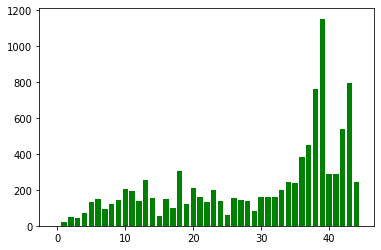

In [3]:
plt.bar(list(hist.keys()), hist.values(), color='g')
plt.show()

In [4]:
accumulatove_runner.predict('WC71A6ZLRNQ87ABOB9ZRSHM1GAX7ESV0ALKAHHAVAASEI')

13.305500984191895

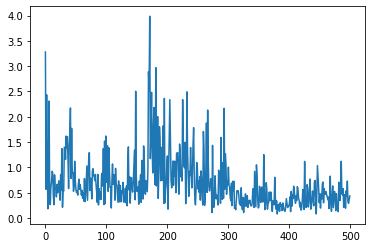

In [5]:
plt.plot(accumulatove_runner.get_loss_history())
plt.show()